# We will build a linear regression model to predict 'sales' using TV as the predictor variable

In [1]:
# Importing data using panda's library
# Understanding data 
import pandas as pd
advertisement = pd.read_csv("tvmarketing.csv")# reading csv i.e exel file from drive

In [2]:
advertisement.head() # .head() will show first five rows of data frame

,TV,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,9.3
3,151.5,18.5
4,180.8,12.9


In [3]:
# our data tells that when our tv budget was 230 lakh we got sales of 22 cr.
advertisement.tail() # this will show the last five rows of our data

,TV,Sales
195,38.2,7.6
196,94.2,9.7
197,177.0,12.8
198,283.6,25.5
199,232.1,13.4


In [4]:
advertisement.info() # it will tell the information about our data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
TV       200 non-null float64
Sales    200 non-null float64
dtypes: float64(2)
memory usage: 3.2 KB


In [5]:
advertisement.shape # there are 200 rows and 2 columns

(200, 2)

In [6]:
# statistical information about data
advertisement.describe()

,TV,Sales
count,200.000000,200.000000
mean,147.042500,14.022500
std,85.854236,5.217457
min,0.700000,1.600000
25%,74.375000,10.375000
50%,149.750000,12.900000
75%,218.825000,17.400000
max,296.400000,27.000000


# Visualising data using seaborn

In [7]:
import seaborn as sns
%matplotlib inline

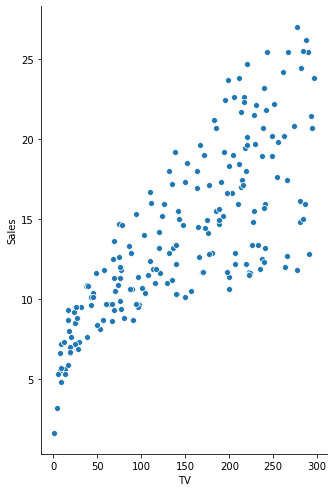

In [8]:
# visualise the relationship between the features and the responce using scatterplots
sns.pairplot(advertisement,x_vars='TV',y_vars='Sales',height = 7, aspect=0.7,kind = 'scatter')

# Performing simple linear regression

Equation of linear regression
y = c+ m1*TV

# General steps in model building using sklearn

# 1. Preparing x and y

a.The scikit_learn library expects x(feature variable) and y(responce variable) to be NumPy arrays.
b. However x can be a dataframe as Pandas is built over NumPy.

In [9]:
# putting feature variable to x
X = advertisement['TV']
X.head()

0    230.1
1     44.5
2     17.2
3    151.5
4    180.8
Name: TV, dtype: float64

In [10]:
# putting response variable to y
y = advertisement['Sales']
y.head()

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: Sales, dtype: float64

# Splitting data into Training and Testing sets

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7 , random_state=100)
# here we have taken train data size as 70%

In [13]:
# Check the shape of X_train, X_test,y_train,y_test
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(140,)
(60,)
(140,)
(60,)


In [14]:
# since the shape of our coefficient data is in one dimention we have to transform it into 2 dimention
import numpy as np
X_train=X_train[:,np.newaxis]
X_test=X_test[:,np.newaxis]

In [15]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(140, 1)
(60, 1)
(140,)
(60,)


# Performing linear regression

In [16]:
# import linear regression from sklearn
from sklearn.linear_model import LinearRegression
# Representing linear regression as lr i.e making it an object
lr = LinearRegression()
# Fit the model using lr.fit()
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

# Coefficients Calculation

In [17]:
# Print the intercept and coefficients
print(lr.intercept_)
print(lr.coef_)

6.989665857411679
[0.04649736]


$y = 6.989 + 0.0464 \times TV $<br>

Now, let's use this equation to predict our sales.

# Predictions

In [18]:
# making predictions on the testing sets
y_predict = lr.predict(X_test)

In [24]:
type(y_predict)

numpy.ndarray

# Computing RMSE and R^2 Values

Text(0, 0.5, 'Sales')

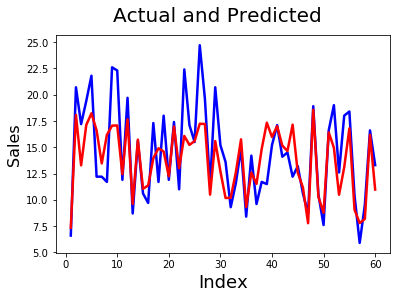

In [26]:
# Actual vs predicted
import matplotlib.pyplot as plt
c = [i for i in range(1,61,1)]         # generating index 
fig = plt.figure()
plt.plot(c,y_test, color="blue", linewidth=2.5, linestyle="-")
plt.plot(c,y_predict, color="red",  linewidth=2.5, linestyle="-")
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('Sales', fontsize=16)                       # Y-label

Text(0, 0.5, 'ytest-ypred')

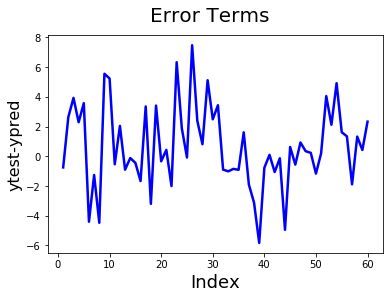

In [28]:
# Error Terms
c = [i for i in range(1,61,1)]
fig = plt.figure()
plt.plot(c,y_test-y_predict, color="blue", linewidth=2.5, linestyle="-")
fig.suptitle('Error Terms', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                      # X-label
plt.ylabel('ytest-ypred', fontsize=16)                # Y-label

In [30]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_predict)

In [31]:
r_squared = r2_score(y_test, y_predict)

In [32]:
print('MSE:',mse)
print('R^2:',r_squared)

MSE: 7.97579853285485
R^2: 0.5942987267783302


we got R^2 as around 0.6 i.e 60% so it is quite a decent model

Text(0, 0.5, 'Predicted Y')

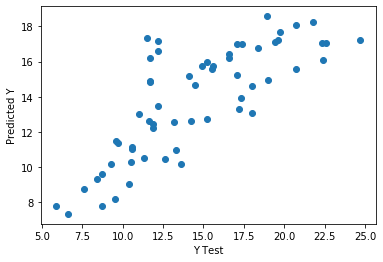

In [35]:
import matplotlib.pyplot as plt
plt.scatter(y_test,y_predict)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')